In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def SpectralVariation(Signal, frame_size, hop_length):
    
    STFT = librosa.stft(Signal, n_fft=FRAME_SIZE, hop_length=hop_length)
    Y = np.abs(STFT) ** 2
    
    previous_frame_freq = 0
    current_frame_freq = 0
    sq_previous = 0
    sq_current = 0
    numerator_sum = 0
    sum_sq_previous = 0
    sum_sq_current = 0
    denom = 0
    SpectralVar = []
    
    for t in range(len(Y.T)-1):

        for freq_bin in range(len(Y)):
            previous_frame_freq = Y.T[t][freq_bin] #a(t-1, freq_bin)
            current_frame_freq = Y.T[t+1][freq_bin] #a(t, freq_bin)

            numerator_sum += previous_frame_freq*current_frame_freq #Sigma(a(t-1, freq_bin)*a(t, freq_bin))

            sum_sq_previous += Y.T[t][freq_bin]**2 #Sigma(a(t-1, freq_bin)**2)
            sum_sq_current += Y.T[t+1][freq_bin]**2 #Sigma(a(t, freq_bin)**2)

            denom = np.sqrt(sum_sq_previous) * np.sqrt(sum_sq_current)
    
        variation = 1 - (numerator_sum/denom)
        variation = round(variation, 5)
        SpectralVar.append(variation)
    
    return SpectralVar

In [3]:
def SpecVar_error(Sig_compare, Sig_ref, Frame_Size, Hop_length, sr=48000):
    SV_Sig_compare = SpectralVariation(Sig_compare, frame_size=Frame_Size, hop_length=Hop_length)
    SV_Sig_ref     = SpectralVariation(Sig_ref, frame_size=Frame_Size, hop_length=Hop_length)
    
    frame_1s = librosa.time_to_frames(1, hop_length=HOP_SIZE, sr=sr )
    frame_2s = librosa.time_to_frames(2, hop_length=HOP_SIZE, sr=sr )
    frame_3s = librosa.time_to_frames(3, hop_length=HOP_SIZE, sr=sr )
    frame_4s = librosa.time_to_frames(4, hop_length=HOP_SIZE, sr=sr )
    frame_5s = librosa.time_to_frames(5, hop_length=HOP_SIZE, sr=sr )
    
    cum_ratio = 0
    
    for i in range(len(SV_Sig_ref)):
        cum_ratio += ((SV_Sig_compare[i]/SV_Sig_ref[i]) - 1)

        if i == (frame_1s):
            ratio0_1 = cum_ratio
        if i == (frame_2s):
            ratio1_2 = cum_ratio - ratio0_1
        if i == (frame_3s):
            ratio2_3 = cum_ratio - ratio1_2 - ratio0_1
        if i == (frame_4s):
            ratio3_4 = cum_ratio - ratio2_3 - ratio1_2 - ratio0_1
        if i == (frame_5s-1):
            ratio4_5 = cum_ratio - ratio3_4 - ratio2_3 - ratio1_2 - ratio0_1

    average0_1sec = ratio0_1/(frame_1s+1) * 100
    average1_2sec = ratio1_2/(frame_1s+1) * 100
    average2_3sec = ratio2_3/(frame_1s+1) * 100
    average3_4sec = ratio3_4/(frame_1s+1) * 100
    average4_5sec = ratio4_5/(frame_1s+1) * 100
    
    average0_1sec = round(average0_1sec,2)
    average1_2sec = round(average1_2sec,2)
    average2_3sec = round(average2_3sec,2)
    average3_4sec = round(average3_4sec,2)
    average4_5sec = round(average4_5sec,2)
    
    average_tot = cum_ratio/(len(SV_Sig_ref)+1) * 100
    average_tot = round(average_tot,2)
    
    return [average0_1sec, average1_2sec, average2_3sec, average3_4sec, average4_5sec, average_tot]

## E Chord

In [4]:
Dry_E_Chord_Hi, sr = librosa.load("Renders/EChord/HiAttack/Dry_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
Dry_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Dry_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
Dry_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Dry_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#VOX HIGH GAIN
Vox_Hi_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/Vox_Hi_Gain_E_Chord_Hi.wav", duration=5, sr=48000, mono=1)
Vox_Hi_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Vox_Hi_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
Vox_Hi_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Vox_Hi_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#VOX MED GAIN
Vox_Med_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/Vox_Med_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
Vox_Med_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Vox_Med_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
Vox_Med_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Vox_Med_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#VOX LOW GAIN
Vox_Low_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/Vox_Lo_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
Vox_Low_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/Vox_Lo_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
Vox_Low_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/Vox_Lo_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#Normalise
Dry_E_Chord_Hi = librosa.util.normalize(Dry_E_Chord_Hi)
Dry_E_Chord_Med = librosa.util.normalize(Dry_E_Chord_Med)
Dry_E_Chord_Lo = librosa.util.normalize(Dry_E_Chord_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_E_Chord_Hi = librosa.util.normalize(Vox_Hi_Gain_E_Chord_Hi)
Vox_Hi_Gain_E_Chord_Med = librosa.util.normalize(Vox_Hi_Gain_E_Chord_Med)
Vox_Hi_Gain_E_Chord_Lo = librosa.util.normalize(Vox_Hi_Gain_E_Chord_Lo)

#VOX MED GAIN
Vox_Med_Gain_E_Chord_Hi = librosa.util.normalize(Vox_Med_Gain_E_Chord_Hi)
Vox_Med_Gain_E_Chord_Med = librosa.util.normalize(Vox_Med_Gain_E_Chord_Med)
Vox_Med_Gain_E_Chord_Lo = librosa.util.normalize(Vox_Med_Gain_E_Chord_Lo)

#VOX LOW GAIN
Vox_Low_Gain_E_Chord_Hi = librosa.util.normalize(Vox_Low_Gain_E_Chord_Hi)
Vox_Low_Gain_E_Chord_Med = librosa.util.normalize(Vox_Low_Gain_E_Chord_Med)
Vox_Low_Gain_E_Chord_Lo = librosa.util.normalize(Vox_Low_Gain_E_Chord_Lo)

In [5]:
#JFET HIGH GAIN
JFET_Hi_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET_Hi_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
JFET_Hi_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/JFET_Hi_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
JFET_Hi_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/JFET_Hi_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#JFET MED GAIN
JFET_Med_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET_Med_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
JFET_Med_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/JFET_Med_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
JFET_Med_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/JFET_Med_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#JFET LOW GAIN
JFET_Low_Gain_E_Chord_Hi, _ = librosa.load("Renders/EChord/HiAttack/JFET_Lo_Gain_E_Chord_Hi.wav", sr=48000, duration=5, mono=1)
JFET_Low_Gain_E_Chord_Med, _ = librosa.load("Renders/EChord/MedAttack/JFET_Lo_Gain_E_Chord_Med.wav", sr=48000, duration=5, mono=1)
JFET_Low_Gain_E_Chord_Lo, _ = librosa.load("Renders/EChord/LoAttack/JFET_Lo_Gain_E_Chord_Lo.wav", sr=48000, duration=5, mono=1)

#Normalise

#JFET HIGH GAIN
JFET_Hi_Gain_E_Chord_Hi = librosa.util.normalize(JFET_Hi_Gain_E_Chord_Hi)
JFET_Hi_Gain_E_Chord_Med = librosa.util.normalize(JFET_Hi_Gain_E_Chord_Med)
JFET_Hi_Gain_E_Chord_Lo = librosa.util.normalize(JFET_Hi_Gain_E_Chord_Lo)

#JFET MED GAIN
JFET_Med_Gain_E_Chord_Hi = librosa.util.normalize(JFET_Med_Gain_E_Chord_Hi)
JFET_Med_Gain_E_Chord_Med = librosa.util.normalize(JFET_Med_Gain_E_Chord_Med)
JFET_Med_Gain_E_Chord_Lo = librosa.util.normalize(JFET_Med_Gain_E_Chord_Lo)

#JFET LOW GAIN
JFET_Low_Gain_E_Chord_Hi = librosa.util.normalize(JFET_Low_Gain_E_Chord_Hi)
JFET_Low_Gain_E_Chord_Med = librosa.util.normalize(JFET_Low_Gain_E_Chord_Med)
JFET_Low_Gain_E_Chord_Lo = librosa.util.normalize(JFET_Low_Gain_E_Chord_Lo)

# E2 String

In [6]:
Dry_E2_String_Hi, sr = librosa.load("Renders/E2String/HiAttack/Dry_E2_String_Hi.wav", sr=48000, duration=5)
Dry_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Dry_E2_String_Med.wav", sr=48000, duration=5)
Dry_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Dry_E2_String_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/Vox_Hi_Gain_E2_String_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Vox_Hi_Gain_E2_String_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Vox_Hi_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/Vox_Med_Gain_E2_String_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Vox_Med_Gain_E2_String_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Vox_Med_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/Vox_Lo_Gain_E2_String_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/Vox_Lo_Gain_E2_String_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/Vox_Lo_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_E2_String_Hi = librosa.util.normalize(Dry_E2_String_Hi)
Dry_E2_String_Med = librosa.util.normalize(Dry_E2_String_Med)
Dry_E2_String_Lo = librosa.util.normalize(Dry_E2_String_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_E2_String_Hi = librosa.util.normalize(Vox_Hi_Gain_E2_String_Hi)
Vox_Hi_Gain_E2_String_Med = librosa.util.normalize(Vox_Hi_Gain_E2_String_Med)
Vox_Hi_Gain_E2_String_Lo = librosa.util.normalize(Vox_Hi_Gain_E2_String_Lo)

#VOX MED GAIN
Vox_Med_Gain_E2_String_Hi = librosa.util.normalize(Vox_Med_Gain_E2_String_Hi)
Vox_Med_Gain_E2_String_Med = librosa.util.normalize(Vox_Med_Gain_E2_String_Med)
Vox_Med_Gain_E2_String_Lo = librosa.util.normalize(Vox_Med_Gain_E2_String_Lo)

#VOX LOW GAIN
Vox_Low_Gain_E2_String_Hi = librosa.util.normalize(Vox_Low_Gain_E2_String_Hi)
Vox_Low_Gain_E2_String_Med = librosa.util.normalize(Vox_Low_Gain_E2_String_Med)
Vox_Low_Gain_E2_String_Lo = librosa.util.normalize(Vox_Low_Gain_E2_String_Lo)

In [7]:
#JFET HIGH GAIN
JFET_Hi_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/JFET_Hi_Gain_E2_String_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/JFET_Hi_Gain_E2_String_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/JFET_Hi_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/JFET_Med_Gain_E2_String_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/JFET_Med_Gain_E2_String_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/JFET_Med_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_E2_String_Hi, _ = librosa.load("Renders/E2String/HiAttack/JFET_Lo_Gain_E2_String_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_E2_String_Med, _ = librosa.load("Renders/E2String/MedAttack/JFET_Lo_Gain_E2_String_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_E2_String_Lo, _ = librosa.load("Renders/E2String/LoAttack/JFET_Lo_Gain_E2_String_Lo.wav", sr=48000, duration=5)

#Normalise

#JFET HIGH GAIN
JFET_Hi_Gain_E2_String_Hi = librosa.util.normalize(JFET_Hi_Gain_E2_String_Hi)
JFET_Hi_Gain_E2_String_Med = librosa.util.normalize(JFET_Hi_Gain_E2_String_Med)
JFET_Hi_Gain_E2_String_Lo = librosa.util.normalize(JFET_Hi_Gain_E2_String_Lo)

#JFET MED GAIN
JFET_Med_Gain_E2_String_Hi = librosa.util.normalize(JFET_Med_Gain_E2_String_Hi)
JFET_Med_Gain_E2_String_Med = librosa.util.normalize(JFET_Med_Gain_E2_String_Med)
JFET_Med_Gain_E2_String_Lo = librosa.util.normalize(JFET_Med_Gain_E2_String_Lo)

#JFET LOW GAIN
JFET_Low_Gain_E2_String_Hi = librosa.util.normalize(JFET_Low_Gain_E2_String_Hi)
JFET_Low_Gain_E2_String_Med = librosa.util.normalize(JFET_Low_Gain_E2_String_Med)
JFET_Low_Gain_E2_String_Lo = librosa.util.normalize(JFET_Low_Gain_E2_String_Lo)

# E4 String 

In [8]:
Dry_E4_String_Hi, sr = librosa.load("Renders/E4String/HiAttack/Dry_E4_String_Hi.wav", sr=48000, duration=5)
Dry_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Dry_E4_String_Med.wav", sr=48000, duration=5)
Dry_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Dry_E4_String_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/Vox_Hi_Gain_E4_String_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Vox_Hi_Gain_E4_String_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Vox_Hi_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/Vox_Med_Gain_E4_String_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Vox_Med_Gain_E4_String_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Vox_Med_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/Vox_Lo_Gain_E4_String_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/Vox_Lo_Gain_E4_String_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/Vox_Lo_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_E4_String_Hi = librosa.util.normalize(Dry_E4_String_Hi)
Dry_E4_String_Med = librosa.util.normalize(Dry_E4_String_Med)
Dry_E4_String_Lo = librosa.util.normalize(Dry_E4_String_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_E4_String_Hi = librosa.util.normalize(Vox_Hi_Gain_E4_String_Hi)
Vox_Hi_Gain_E4_String_Med = librosa.util.normalize(Vox_Hi_Gain_E4_String_Med)
Vox_Hi_Gain_E4_String_Lo = librosa.util.normalize(Vox_Hi_Gain_E4_String_Lo)

#VOX MED GAIN
Vox_Med_Gain_E4_String_Hi = librosa.util.normalize(Vox_Med_Gain_E4_String_Hi)
Vox_Med_Gain_E4_String_Med = librosa.util.normalize(Vox_Med_Gain_E4_String_Med)
Vox_Med_Gain_E4_String_Lo = librosa.util.normalize(Vox_Med_Gain_E4_String_Lo)

#VOX LOW GAIN
Vox_Low_Gain_E4_String_Hi = librosa.util.normalize(Vox_Low_Gain_E4_String_Hi)
Vox_Low_Gain_E4_String_Med = librosa.util.normalize(Vox_Low_Gain_E4_String_Med)
Vox_Low_Gain_E4_String_Lo = librosa.util.normalize(Vox_Low_Gain_E4_String_Lo)

In [9]:
#JFET HIGH GAIN
JFET_Hi_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/JFET_Hi_Gain_E4_String_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/JFET_Hi_Gain_E4_String_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/JFET_Hi_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/JFET_Med_Gain_E4_String_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/JFET_Med_Gain_E4_String_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/JFET_Med_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_E4_String_Hi, _ = librosa.load("Renders/E4String/HiAttack/JFET_Lo_Gain_E4_String_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_E4_String_Med, _ = librosa.load("Renders/E4String/MedAttack/JFET_Lo_Gain_E4_String_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_E4_String_Lo, _ = librosa.load("Renders/E4String/LoAttack/JFET_Lo_Gain_E4_String_Lo.wav", sr=48000, duration=5)

#Normalise
#JFET HIGH GAIN
JFET_Hi_Gain_E4_String_Hi = librosa.util.normalize(JFET_Hi_Gain_E4_String_Hi)
JFET_Hi_Gain_E4_String_Med = librosa.util.normalize(JFET_Hi_Gain_E4_String_Med)
JFET_Hi_Gain_E4_String_Lo = librosa.util.normalize(JFET_Hi_Gain_E4_String_Lo)

#JFET MED GAIN
JFET_Med_Gain_E4_String_Hi = librosa.util.normalize(JFET_Med_Gain_E4_String_Hi)
JFET_Med_Gain_E4_String_Med = librosa.util.normalize(JFET_Med_Gain_E4_String_Med)
JFET_Med_Gain_E4_String_Lo = librosa.util.normalize(JFET_Med_Gain_E4_String_Lo)

#JFET LOW GAIN
JFET_Low_Gain_E4_String_Hi = librosa.util.normalize(JFET_Low_Gain_E4_String_Hi)
JFET_Low_Gain_E4_String_Med = librosa.util.normalize(JFET_Low_Gain_E4_String_Med)
JFET_Low_Gain_E4_String_Lo = librosa.util.normalize(JFET_Low_Gain_E4_String_Lo)

# D Chord

In [10]:
Dry_D_Chord_Hi, sr = librosa.load("Renders/DChord/HiAttack/Dry_D_Chord_Hi.wav", sr=48000, duration=5)
Dry_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Dry_D_Chord_Med.wav", sr=48000, duration=5)
Dry_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Dry_D_Chord_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/Vox_Hi_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Vox_Hi_Gain_D_Chord_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Vox_Hi_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/Vox_Med_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Vox_Med_Gain_D_Chord_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Vox_Med_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/Vox_Lo_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/Vox_Lo_Gain_D_Chord_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/Vox_Lo_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_D_Chord_Hi = librosa.util.normalize(Dry_D_Chord_Hi)
Dry_D_Chord_Med = librosa.util.normalize(Dry_D_Chord_Med)
Dry_D_Chord_Lo = librosa.util.normalize(Dry_D_Chord_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_D_Chord_Hi = librosa.util.normalize(Vox_Hi_Gain_D_Chord_Hi)
Vox_Hi_Gain_D_Chord_Med = librosa.util.normalize(Vox_Hi_Gain_D_Chord_Med)
Vox_Hi_Gain_D_Chord_Lo = librosa.util.normalize(Vox_Hi_Gain_D_Chord_Lo)

#VOX MED GAIN
Vox_Med_Gain_D_Chord_Hi = librosa.util.normalize(Vox_Med_Gain_D_Chord_Hi)
Vox_Med_Gain_D_Chord_Med = librosa.util.normalize(Vox_Med_Gain_D_Chord_Med)
Vox_Med_Gain_D_Chord_Lo = librosa.util.normalize(Vox_Med_Gain_D_Chord_Lo)

#VOX LOW GAIN
Vox_Low_Gain_D_Chord_Hi = librosa.util.normalize(Vox_Low_Gain_D_Chord_Hi)
Vox_Low_Gain_D_Chord_Med = librosa.util.normalize(Vox_Low_Gain_D_Chord_Med)
Vox_Low_Gain_D_Chord_Lo = librosa.util.normalize(Vox_Low_Gain_D_Chord_Lo)

In [11]:
#JFET HIGH GAIN
JFET_Hi_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/JFET_Hi_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/JFET_Hi_Gain_D_Chord_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/JFET_Hi_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/JFET_Med_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/JFET_Med_Gain_D_Chord_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/JFET_Med_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_D_Chord_Hi, _ = librosa.load("Renders/DChord/HiAttack/JFET_Lo_Gain_D_Chord_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_D_Chord_Med, _ = librosa.load("Renders/DChord/MedAttack/JFET_Lo_Gain_D_Chord_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_D_Chord_Lo, _ = librosa.load("Renders/DChord/LoAttack/JFET_Lo_Gain_D_Chord_Lo.wav", sr=48000, duration=5)

#Normalise
#JFET HIGH GAIN
JFET_Hi_Gain_D_Chord_Hi = librosa.util.normalize(JFET_Hi_Gain_D_Chord_Hi)
JFET_Hi_Gain_D_Chord_Med = librosa.util.normalize(JFET_Hi_Gain_D_Chord_Med)
JFET_Hi_Gain_D_Chord_Lo = librosa.util.normalize(JFET_Hi_Gain_D_Chord_Lo)

#JFET MED GAIN
JFET_Med_Gain_D_Chord_Hi = librosa.util.normalize(JFET_Med_Gain_D_Chord_Hi)
JFET_Med_Gain_D_Chord_Med = librosa.util.normalize(JFET_Med_Gain_D_Chord_Med)
JFET_Med_Gain_D_Chord_Lo = librosa.util.normalize(JFET_Med_Gain_D_Chord_Lo)

#JFET LOW GAIN
JFET_Low_Gain_D_Chord_Hi = librosa.util.normalize(JFET_Low_Gain_D_Chord_Hi)
JFET_Low_Gain_D_Chord_Med = librosa.util.normalize(JFET_Low_Gain_D_Chord_Med)
JFET_Low_Gain_D_Chord_Lo = librosa.util.normalize(JFET_Low_Gain_D_Chord_Lo)

# D3 String

In [12]:
Dry_D3_String_Hi, sr = librosa.load("Renders/D3String/HiAttack/Dry_D3_String_Hi.wav", sr=48000, duration=5)
Dry_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Dry_D3_String_Med.wav", sr=48000, duration=5)
Dry_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Dry_D3_String_Lo.wav", sr=48000, duration=5)

#VOX HIGH GAIN
Vox_Hi_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/Vox_Hi_Gain_D3_String_Hi.wav", sr=48000, duration=5)
Vox_Hi_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Vox_Hi_Gain_D3_String_Med.wav", sr=48000, duration=5)
Vox_Hi_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Vox_Hi_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#VOX MED GAIN
Vox_Med_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/Vox_Med_Gain_D3_String_Hi.wav", sr=48000, duration=5)
Vox_Med_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Vox_Med_Gain_D3_String_Med.wav", sr=48000, duration=5)
Vox_Med_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Vox_Med_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#VOX LOW GAIN
Vox_Low_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/Vox_Lo_Gain_D3_String_Hi.wav", sr=48000, duration=5)
Vox_Low_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/Vox_Lo_Gain_D3_String_Med.wav", sr=48000, duration=5)
Vox_Low_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/Vox_Lo_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#Normalise
Dry_D3_String_Hi = librosa.util.normalize(Dry_D3_String_Hi)
Dry_D3_String_Med = librosa.util.normalize(Dry_D3_String_Med)
Dry_D3_String_Lo = librosa.util.normalize(Dry_D3_String_Lo)

#VOX HIGH GAIN
Vox_Hi_Gain_D3_String_Hi = librosa.util.normalize(Vox_Hi_Gain_D3_String_Hi)
Vox_Hi_Gain_D3_String_Med = librosa.util.normalize(Vox_Hi_Gain_D3_String_Med)
Vox_Hi_Gain_D3_String_Lo = librosa.util.normalize(Vox_Hi_Gain_D3_String_Lo)

#VOX MED GAIN
Vox_Med_Gain_D3_String_Hi = librosa.util.normalize(Vox_Med_Gain_D3_String_Hi)
Vox_Med_Gain_D3_String_Med = librosa.util.normalize(Vox_Med_Gain_D3_String_Med)
Vox_Med_Gain_D3_String_Lo = librosa.util.normalize(Vox_Med_Gain_D3_String_Lo)

#VOX LOW GAIN
Vox_Low_Gain_D3_String_Hi = librosa.util.normalize(Vox_Low_Gain_D3_String_Hi)
Vox_Low_Gain_D3_String_Med = librosa.util.normalize(Vox_Low_Gain_D3_String_Med)
Vox_Low_Gain_D3_String_Lo = librosa.util.normalize(Vox_Low_Gain_D3_String_Lo)

In [13]:
#JFET HIGH GAIN
JFET_Hi_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/JFET_Hi_Gain_D3_String_Hi.wav", sr=48000, duration=5)
JFET_Hi_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/JFET_Hi_Gain_D3_String_Med.wav", sr=48000, duration=5)
JFET_Hi_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/JFET_Hi_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#JFET MED GAIN
JFET_Med_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/JFET_Med_Gain_D3_String_Hi.wav", sr=48000, duration=5)
JFET_Med_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/JFET_Med_Gain_D3_String_Med.wav", sr=48000, duration=5)
JFET_Med_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/JFET_Med_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#JFET LOW GAIN
JFET_Low_Gain_D3_String_Hi, _ = librosa.load("Renders/D3String/HiAttack/JFET_Lo_Gain_D3_String_Hi.wav", sr=48000, duration=5)
JFET_Low_Gain_D3_String_Med, _ = librosa.load("Renders/D3String/MedAttack/JFET_Lo_Gain_D3_String_Med.wav", sr=48000, duration=5)
JFET_Low_Gain_D3_String_Lo, _ = librosa.load("Renders/D3String/LoAttack/JFET_Lo_Gain_D3_String_Lo.wav", sr=48000, duration=5)

#Normalise

#JFET HIGH GAIN
JFET_Hi_Gain_D3_String_Hi = librosa.util.normalize(JFET_Hi_Gain_D3_String_Hi)
JFET_Hi_Gain_D3_String_Med = librosa.util.normalize(JFET_Hi_Gain_D3_String_Med)
JFET_Hi_Gain_D3_String_Lo = librosa.util.normalize(JFET_Hi_Gain_D3_String_Lo)

#JFET MED GAIN
JFET_Med_Gain_D3_String_Hi = librosa.util.normalize(JFET_Med_Gain_D3_String_Hi)
JFET_Med_Gain_D3_String_Med = librosa.util.normalize(JFET_Med_Gain_D3_String_Med)
JFET_Med_Gain_D3_String_Lo = librosa.util.normalize(JFET_Med_Gain_D3_String_Lo)

#JFET LOW GAIN
JFET_Low_Gain_D3_String_Hi = librosa.util.normalize(JFET_Low_Gain_D3_String_Hi)
JFET_Low_Gain_D3_String_Med = librosa.util.normalize(JFET_Low_Gain_D3_String_Med)
JFET_Low_Gain_D3_String_Lo = librosa.util.normalize(JFET_Low_Gain_D3_String_Lo)

In [14]:
FRAME_SIZE = 2048
HOP_SIZE = 1024

# E Chord

## High Intensity

### High Gain

In [15]:
SpecVar_error(JFET_Hi_Gain_E_Chord_Hi, Vox_Hi_Gain_E_Chord_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-15.81, -21.65, -13.67, -0.51, 14.29, -7.47]

### Medium Gain

In [16]:
SpecVar_error(JFET_Med_Gain_E_Chord_Hi, Vox_Med_Gain_E_Chord_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-12.97, -16.21, -7.23, 2.59, 8.25, -5.11]

### Low Gain

In [17]:
SpecVar_error(JFET_Low_Gain_E_Chord_Hi, Vox_Low_Gain_E_Chord_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-7.58, -42.39, -43.57, -45.09, -44.5, -36.63]

## Medium Intensity

### High Gain

In [18]:
SpecVar_error(JFET_Hi_Gain_E_Chord_Med, Vox_Hi_Gain_E_Chord_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-7.8, -5.25, 23.9, 40.88, 55.38, 21.42]

### Medium Gain

In [19]:
SpecVar_error(JFET_Med_Gain_E_Chord_Med, Vox_Med_Gain_E_Chord_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[9.09, 5.74, 9.55, 12.36, 12.45, 9.84]

### Low Gain

In [20]:
SpecVar_error(JFET_Low_Gain_E_Chord_Med, Vox_Low_Gain_E_Chord_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[40.09, 0.75, -1.91, -5.08, -5.2, 5.73]

## Low Intensity

### High Gain

In [21]:
SpecVar_error(JFET_Hi_Gain_E_Chord_Lo, Vox_Hi_Gain_E_Chord_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-28.58, -36.55, -22.78, -12.79, -6.26, -21.39]

### Medium Gain

In [22]:
SpecVar_error(JFET_Med_Gain_E_Chord_Lo, Vox_Med_Gain_E_Chord_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-20.9, -34.84, -33.64, -33.32, -32.53, -31.04]

### Low Gain

In [23]:
SpecVar_error(JFET_Low_Gain_E_Chord_Lo, Vox_Low_Gain_E_Chord_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-9.48, -21.42, -21.36, -21.36, -20.91, -18.9]

# E2 String

## High Intensity

### High Gain

In [24]:
SpecVar_error(JFET_Hi_Gain_E2_String_Hi, Vox_Hi_Gain_E2_String_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-41.23, -28.29, -4.67, 18.62, 40.31, -3.05]

### Medium Gain

In [25]:
SpecVar_error(JFET_Med_Gain_E2_String_Hi, Vox_Med_Gain_E2_String_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-11.43, 42.04, 76.31, 87.47, 91.62, 57.2]

### Low Gain

In [26]:
SpecVar_error(JFET_Low_Gain_E2_String_Hi, Vox_Low_Gain_E2_String_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-45.67, -66.77, -69.87, -70.69, -69.46, -64.49]

## Medium Intensity

### High Gain

In [27]:
SpecVar_error(JFET_Hi_Gain_E2_String_Med, Vox_Hi_Gain_E2_String_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-46.32, -39.05, -30.55, -15.4, -2.13, -26.69]

### Medium Gain

In [28]:
SpecVar_error(JFET_Med_Gain_E2_String_Med, Vox_Med_Gain_E2_String_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-21.74, -12.33, -8.79, -6.61, -5.86, -11.07]

### Low Gain

In [29]:
SpecVar_error(JFET_Low_Gain_E2_String_Med, Vox_Low_Gain_E2_String_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-42.8, -55.95, -57.85, -58.42, -57.3, -54.46]

## Low Intensity

### High Gain

In [30]:
SpecVar_error(JFET_Hi_Gain_E2_String_Lo, Vox_Hi_Gain_E2_String_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[2.46, 44.06, 73.74, 96.24, 109.95, 65.29]

### Medium Gain

In [31]:
SpecVar_error(JFET_Med_Gain_E2_String_Lo, Vox_Med_Gain_E2_String_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[6.42, 9.26, 10.5, 10.86, 10.72, 9.55]

### Low Gain

In [32]:
SpecVar_error(JFET_Low_Gain_E2_String_Lo, Vox_Low_Gain_E2_String_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[8.3, 4.36, 0.93, 0.57, 0.35, 2.9]

# E4 String

## High Intensity

### High Gain

In [33]:
SpecVar_error(JFET_Hi_Gain_E4_String_Hi, Vox_Hi_Gain_E4_String_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-65.87, -62.88, -59.6, -59.4, -58.14, -61.18]

### Medium Gain

In [34]:
SpecVar_error(JFET_Med_Gain_E4_String_Hi, Vox_Med_Gain_E4_String_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-71.39, -78.4, -78.37, -78.36, -76.69, -76.64]

### Low Gain

In [35]:
SpecVar_error(JFET_Low_Gain_E4_String_Hi, Vox_Low_Gain_E4_String_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-79.3, -91.94, -92.01, -92.01, -90.06, -89.06]

## Medium Intensity

### High Gain

In [36]:
SpecVar_error(JFET_Hi_Gain_E4_String_Med, Vox_Hi_Gain_E4_String_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-24.3, -52.86, -51.19, -50.86, -49.72, -45.79]

### Medium Gain

In [37]:
SpecVar_error(JFET_Med_Gain_E4_String_Med, Vox_Med_Gain_E4_String_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-20.3, -46.96, -49.92, -50.16, -49.11, -43.29]

### Low Gain

In [38]:
SpecVar_error(JFET_Low_Gain_E4_String_Med, Vox_Low_Gain_E4_String_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-16.99, -42.2, -45.36, -45.62, -44.66, -38.96]

## Low Intensity

### High Gain

In [39]:
SpecVar_error(JFET_Hi_Gain_E4_String_Lo, Vox_Hi_Gain_E4_String_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-15.65, -44.85, -46.72, -46.65, -45.64, -39.9]

### Medium Gain

In [40]:
SpecVar_error(JFET_Med_Gain_E4_String_Lo, Vox_Med_Gain_E4_String_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-47.8, -64.5, -65.39, -65.43, -64.03, -61.43]

### Low Gain

In [41]:
SpecVar_error(JFET_Low_Gain_E4_String_Lo, Vox_Low_Gain_E4_String_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-42.99, -54.26, -54.92, -54.94, -53.77, -52.17]

# D Chord

## High Intensity

### High Gain

In [42]:
SpecVar_error(JFET_Hi_Gain_D_Chord_Hi, Vox_Hi_Gain_D_Chord_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-9.99, 13.03, 32.13, 51.53, 62.87, 29.91]

### Medium Gain

In [43]:
SpecVar_error(JFET_Med_Gain_D_Chord_Hi, Vox_Med_Gain_D_Chord_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[23.6, 49.4, 58.37, 59.73, 58.68, 49.96]

### Low Gain

In [44]:
SpecVar_error(JFET_Low_Gain_D_Chord_Hi, Vox_Low_Gain_D_Chord_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-5.42, -49.84, -55.13, -55.73, -54.62, -44.15]

## Medium Intensity

### High Gain

In [45]:
SpecVar_error(JFET_Hi_Gain_D_Chord_Med, Vox_Hi_Gain_D_Chord_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-23.08, -21.29, -3.77, 9.35, 16.05, -4.55]

### Medium Gain

In [46]:
SpecVar_error(JFET_Med_Gain_D_Chord_Med, Vox_Med_Gain_D_Chord_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-3.78, 0.8, 4.0, 4.64, 4.62, 2.06]

### Low Gain

In [47]:
SpecVar_error(JFET_Low_Gain_D_Chord_Med, Vox_Low_Gain_D_Chord_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[10.42, -26.1, -29.61, -30.02, -29.43, -20.95]

## Low Intensity

### High Gain

In [48]:
SpecVar_error(JFET_Hi_Gain_D_Chord_Lo, Vox_Hi_Gain_D_Chord_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-33.5, -22.01, -7.01, -0.88, 0.33, -12.62]

### Medium Gain

In [49]:
SpecVar_error(JFET_Med_Gain_D_Chord_Lo, Vox_Med_Gain_D_Chord_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-19.81, -27.0, -27.19, -27.19, -26.62, -25.56]

### Low Gain

In [50]:
SpecVar_error(JFET_Low_Gain_D_Chord_Lo, Vox_Low_Gain_D_Chord_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-6.02, -16.43, -17.58, -17.75, -17.39, -15.03]

# D3 String

## High Intensity

### High Gain

In [51]:
SpecVar_error(JFET_Hi_Gain_D3_String_Hi, Vox_Hi_Gain_D3_String_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-14.34, -13.22, 1.49, 17.89, 24.39, 3.24]

### Medium Gain

In [52]:
SpecVar_error(JFET_Med_Gain_D3_String_Hi, Vox_Med_Gain_D3_String_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[13.55, 15.88, 16.67, 16.96, 16.64, 15.94]

### Low Gain

In [53]:
SpecVar_error(JFET_Low_Gain_D3_String_Hi, Vox_Low_Gain_D3_String_Hi, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-54.28, -81.98, -82.9, -83.07, -81.34, -76.71]

## Medium Intensity

### High Gain

In [54]:
SpecVar_error(JFET_Hi_Gain_D3_String_Med, Vox_Hi_Gain_D3_String_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-26.1, -13.96, -0.35, 4.81, 5.99, -5.92]

### Medium Gain

In [55]:
SpecVar_error(JFET_Med_Gain_D3_String_Med, Vox_Med_Gain_D3_String_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-25.52, -44.52, -44.71, -44.78, -43.83, -40.67]

### Low Gain

In [56]:
SpecVar_error(JFET_Low_Gain_D3_String_Med, Vox_Low_Gain_D3_String_Med, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-27.8, -57.4, -58.07, -58.18, -56.97, -51.69]

## Low Intensity

### High Gain

In [57]:
SpecVar_error(JFET_Hi_Gain_D3_String_Lo, Vox_Hi_Gain_D3_String_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-3.42, 23.3, 47.08, 53.72, 54.28, 34.99]

### Medium Gain

In [58]:
SpecVar_error(JFET_Med_Gain_D3_String_Lo, Vox_Med_Gain_D3_String_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-22.86, -34.83, -36.01, -36.29, -35.56, -33.11]

### Low Gain

In [59]:
SpecVar_error(JFET_Low_Gain_D3_String_Lo, Vox_Low_Gain_D3_String_Lo, Frame_Size=FRAME_SIZE, Hop_length=HOP_SIZE, sr=sr)

[-23.96, -30.94, -32.02, -32.28, -31.63, -30.17]

In [60]:
SV_Vox_Hi_Gain_E_Chord_Hi = SpectralVariation(Vox_Hi_Gain_E_Chord_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [61]:
SV_JFET_Hi_Gain_E_Chord_Hi = SpectralVariation(JFET_Hi_Gain_E_Chord_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [62]:
frames = range(len(SV_JFET_Hi_Gain_E_Chord_Hi))
t = librosa.frames_to_time(frames,  hop_length=HOP_SIZE, sr=sr)

<function matplotlib.pyplot.show(close=None, block=None)>

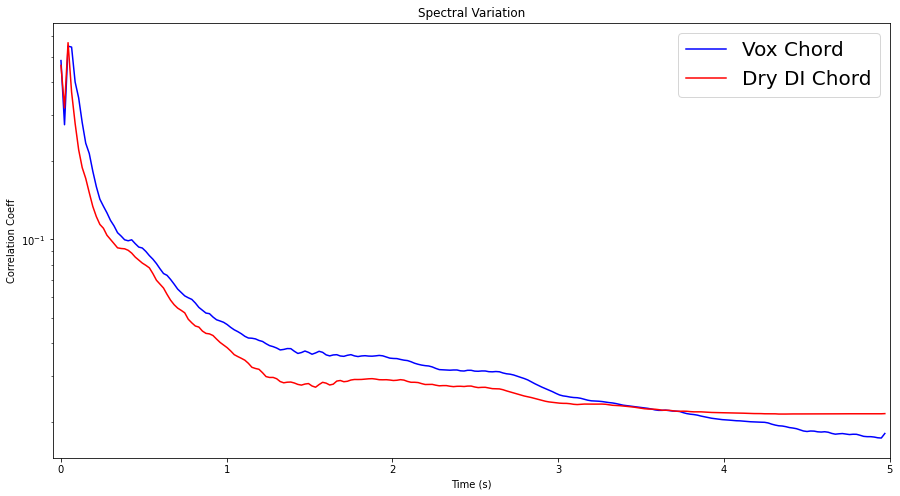

In [63]:
plt.figure(figsize=(15,8))

plt.plot(t, SV_Vox_Hi_Gain_E_Chord_Hi, color='b', label = 'Vox Chord')
plt.plot(t, SV_JFET_Hi_Gain_E_Chord_Hi, color='r', label = 'Dry DI Chord')
#plt.plot(t, FetChord_specvar, color= 'g', label= 'JFET Chord')

#plt.plot(t, sv_Vox_plus_50, "--", color='lightseagreen', label="Vox Chord +- 50%")
#plt.plot(t, sv_Vox_minus_50, "--", color='lightseagreen')



#plt.ylim(0,)
plt.xlim(-0.05,5)

plt.title("Spectral Variation")
plt.ylabel("Correlation Coeff")
plt.xlabel('Time (s)')
plt.legend(fontsize=20)
plt.semilogy()

plt.show

In [64]:
SV_Dry_E_Chord_Hi = SpectralVariation(Dry_E_Chord_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [65]:
SV_Vox_Med_Gain_E_Chord_Hi = SpectralVariation(Vox_Med_Gain_E_Chord_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [66]:
SV_JFET_Med_Gain_E_Chord_Hi = SpectralVariation(JFET_Med_Gain_E_Chord_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

<function matplotlib.pyplot.show(close=None, block=None)>

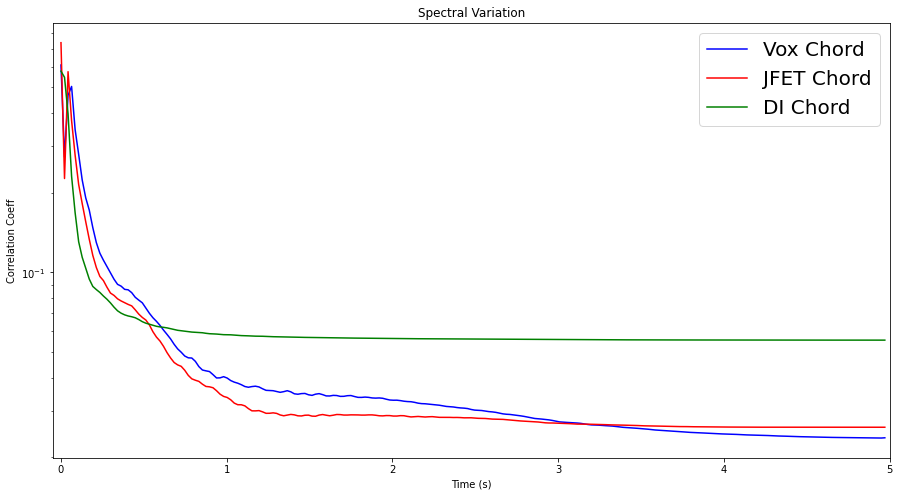

In [67]:
plt.figure(figsize=(15,8))

plt.plot(t, SV_Vox_Med_Gain_E_Chord_Hi, color='b', label = 'Vox Chord')
plt.plot(t, SV_JFET_Med_Gain_E_Chord_Hi, color='r', label = 'JFET Chord')
plt.plot(t, SV_Dry_E_Chord_Hi, color= 'g', label= 'DI Chord')

#plt.plot(t, sv_Vox_plus_50, "--", color='lightseagreen', label="Vox Chord +- 50%")
#plt.plot(t, sv_Vox_minus_50, "--", color='lightseagreen')



#plt.ylim(0,0.01)
plt.xlim(-0.05,5)

plt.title("Spectral Variation")
plt.ylabel("Correlation Coeff")
plt.xlabel('Time (s)')
plt.legend(fontsize=20)
plt.semilogy()

plt.show

In [68]:
range(len(SV_JFET_Med_Gain_E_Chord_Hi))

range(0, 234)

In [69]:
librosa.time_to_frames(5, hop_length=HOP_SIZE, sr=sr )

234

In [70]:
SV_Vox_Med_Gain_E2_String_Hi = SpectralVariation(Vox_Med_Gain_E2_String_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [71]:
SV_JFET_Med_Gain_E2_String_Hi = SpectralVariation(JFET_Med_Gain_E2_String_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [72]:
SV_Dry_E2_String_Hi = SpectralVariation(Dry_E2_String_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

<function matplotlib.pyplot.show(close=None, block=None)>

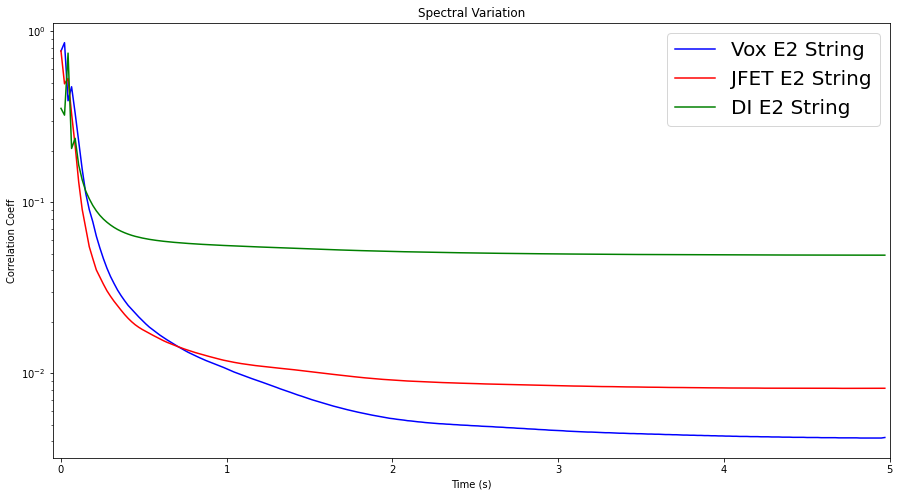

In [73]:
plt.figure(figsize=(15,8))

plt.plot(t, SV_Vox_Med_Gain_E2_String_Hi, color='b', label = 'Vox E2 String')
plt.plot(t, SV_JFET_Med_Gain_E2_String_Hi, color='r', label = 'JFET E2 String')
plt.plot(t, SV_Dry_E2_String_Hi, color= 'g', label= 'DI E2 String')

#plt.plot(t, sv_Vox_plus_50, "--", color='lightseagreen', label="Vox Chord +- 50%")
#plt.plot(t, sv_Vox_minus_50, "--", color='lightseagreen')



#plt.ylim(0,0.01)
plt.xlim(-0.05,5)

plt.title("Spectral Variation")
plt.ylabel("Correlation Coeff")
plt.xlabel('Time (s)')
plt.legend(fontsize=20)
plt.semilogy()

plt.show

In [74]:
SV_Vox_Low_Gain_E2_String_Hi = SpectralVariation(Vox_Low_Gain_E2_String_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [75]:
SV_JFET_Low_Gain_E2_String_Hi = SpectralVariation(JFET_Low_Gain_E2_String_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [76]:
SV_Dry_E2_String_Hi = SpectralVariation(Dry_E2_String_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

<function matplotlib.pyplot.show(close=None, block=None)>

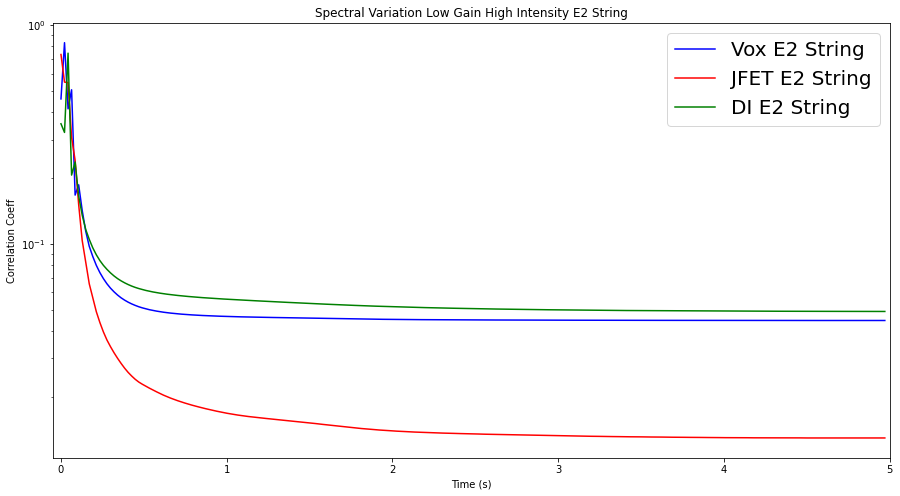

In [77]:
plt.figure(figsize=(15,8))

plt.plot(t, SV_Vox_Low_Gain_E2_String_Hi, color='b', label = 'Vox E2 String')
plt.plot(t, SV_JFET_Low_Gain_E2_String_Hi, color='r', label = 'JFET E2 String')
plt.plot(t, SV_Dry_E2_String_Hi, color= 'g', label= 'DI E2 String')

#plt.plot(t, sv_Vox_plus_50, "--", color='lightseagreen', label="Vox Chord +- 50%")
#plt.plot(t, sv_Vox_minus_50, "--", color='lightseagreen')



#plt.ylim(0,0.01)
plt.xlim(-0.05,5)

plt.title("Spectral Variation Low Gain High Intensity E2 String")
plt.ylabel("Correlation Coeff")
plt.xlabel('Time (s)')
plt.legend(fontsize=20)
plt.semilogy()

plt.show

In [78]:
SV_Vox_Med_Gain_D_Chord_Med = SpectralVariation(Vox_Med_Gain_D_Chord_Med, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [79]:
SV_JFET_Med_Gain_D_Chord_Med = SpectralVariation(JFET_Med_Gain_D_Chord_Med, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [80]:
SV_Dry_D_Chord_Med = SpectralVariation(Dry_D_Chord_Med, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

<function matplotlib.pyplot.show(close=None, block=None)>

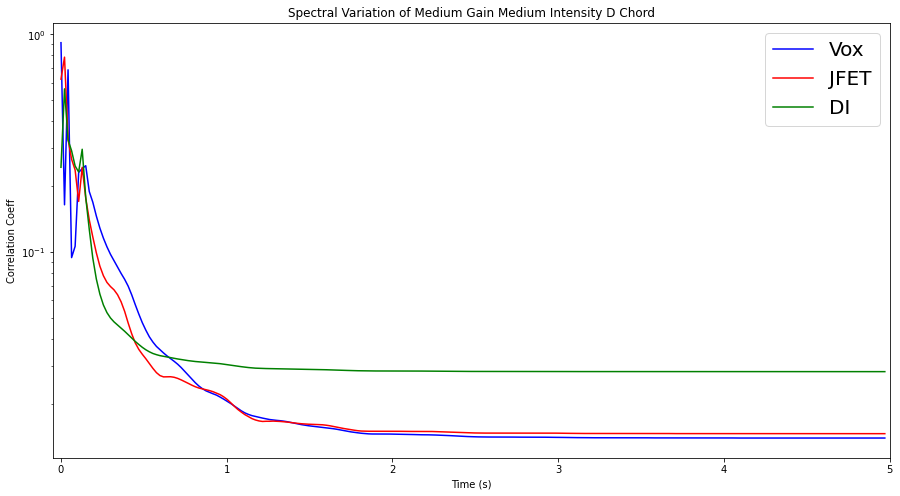

In [81]:
plt.figure(figsize=(15,8))

plt.plot(t, SV_Vox_Med_Gain_D_Chord_Med, color='b', label = 'Vox')
plt.plot(t, SV_JFET_Med_Gain_D_Chord_Med, color='r', label = 'JFET')
plt.plot(t, SV_Dry_D_Chord_Med, color= 'g', label= 'DI')

#plt.plot(t, sv_Vox_plus_50, "--", color='lightseagreen', label="Vox Chord +- 50%")
#plt.plot(t, sv_Vox_minus_50, "--", color='lightseagreen')



#plt.ylim(0,0.01)
plt.xlim(-0.05,5)

plt.title("Spectral Variation of Medium Gain Medium Intensity D Chord")
plt.ylabel("Correlation Coeff")
plt.xlabel('Time (s)')
plt.legend(fontsize=20)
plt.semilogy()

plt.show

In [82]:
SV_Vox_Low_Gain_E4_String_Hi = SpectralVariation(Vox_Low_Gain_E4_String_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [83]:
SV_JFET_Low_Gain_E4_String_Hi = SpectralVariation(JFET_Low_Gain_E4_String_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

In [84]:
SV_Dry_E4_String_Hi = SpectralVariation(Dry_E4_String_Hi, frame_size=FRAME_SIZE, hop_length=HOP_SIZE)

<function matplotlib.pyplot.show(close=None, block=None)>

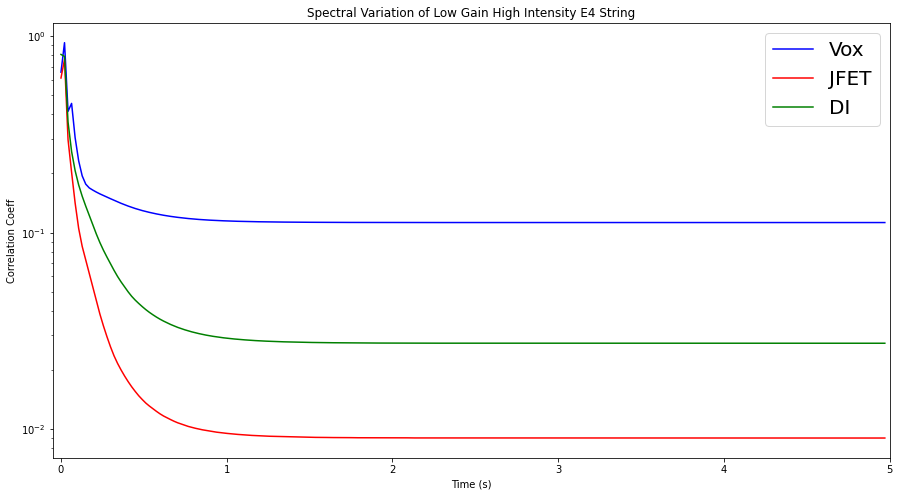

In [85]:
plt.figure(figsize=(15,8))

plt.plot(t, SV_Vox_Low_Gain_E4_String_Hi, color='b', label = 'Vox')
plt.plot(t, SV_JFET_Low_Gain_E4_String_Hi, color='r', label = 'JFET')
plt.plot(t, SV_Dry_E4_String_Hi, color= 'g', label= 'DI')

#plt.plot(t, sv_Vox_plus_50, "--", color='lightseagreen', label="Vox Chord +- 50%")
#plt.plot(t, sv_Vox_minus_50, "--", color='lightseagreen')



#plt.ylim(0,0.01)
plt.xlim(-0.05,5)

plt.title("Spectral Variation of Low Gain High Intensity E4 String")
plt.ylabel("Correlation Coeff")
plt.xlabel('Time (s)')
plt.legend(fontsize=20)
plt.semilogy()

plt.show